In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import scipy.fftpack as sf

距离徙动

eta_c: 0.6268407403812173


Text(0, 0.5, 'azimuth time/s')

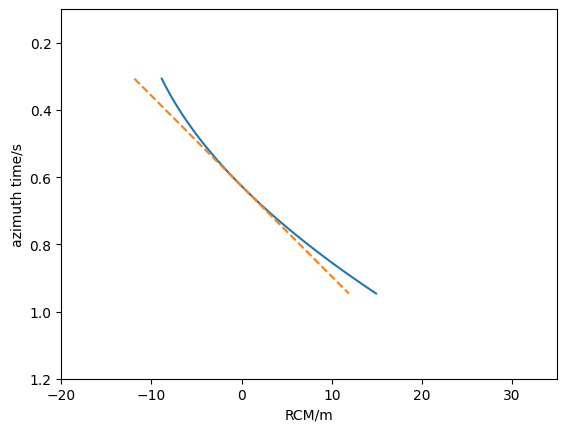

In [33]:
V_r = 7100
theta_rc = -0.3*np.pi/180
R_etac = 850e+3
PRF = 1700
T_a = 0.64
eta_c = -R_etac*np.sin(theta_rc)/V_r
eta = np.linspace(-T_a/2,T_a/2-1/PRF,int(T_a*PRF))+eta_c
RCM = -V_r*np.sin(theta_rc)*(eta-eta_c) + 0.5*((V_r*np.cos(theta_rc))**2)/R_etac*(eta-eta_c)**2
RCM_Lin = -V_r*np.sin(theta_rc)*(eta-eta_c)
print('eta_c:',eta_c)
plt.figure()
plt.plot(RCM ,eta)
plt.plot(RCM_Lin,eta,'--')
plt.ylim(1.2,0.1)
plt.xlim(-20,35)
plt.xlabel('RCM/m')
plt.ylabel('azimuth time/s')

f_dop: 1333.6072


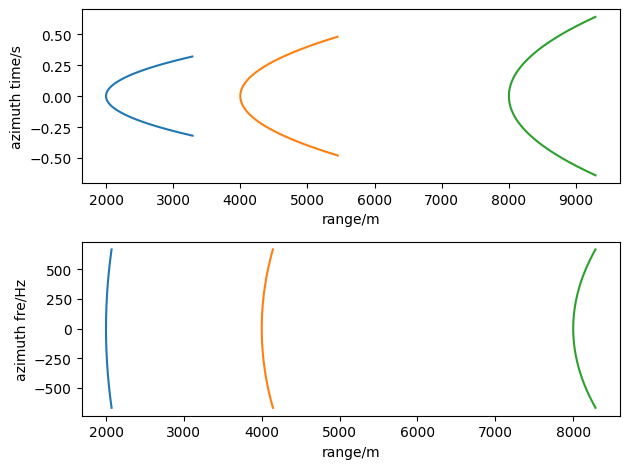

In [78]:
V_r = 7100
V_s = V_r*1.06
Lambda = 5.7
La = 10
PRF = 1700
R_0 = np.array([2000,4000,8000]).reshape(1,3)
Ta_1 = 0.64
Ta_2 = 0.64*6000/4000
Ta_3 = 0.64*8000/4000

eta_1 = np.linspace(-Ta_1/2,Ta_1/2-1/PRF,int(Ta_1*PRF))
eta_2 = np.linspace(-Ta_2/2,Ta_2/2-1/PRF,int(Ta_2*PRF))
eta_3 = np.linspace(-Ta_3/2,Ta_3/2-1/PRF,int(Ta_3*PRF))

R_1 = R_0[:,0]  + 0.5*((V_r*np.cos(theta_rc))**2)/R_0[:,0]*(eta_1)**2
R_2 = R_0[:,1]  + 0.5*((V_r*np.cos(theta_rc))**2)/R_0[:,1]*(eta_2)**2
R_3 = R_0[:,2]  + 0.5*((V_r*np.cos(theta_rc))**2)/R_0[:,2]*(eta_3)**2

N = int(Ta_1*PRF)
f_dop = 0.886*2*V_s/La
print('f_dop:',f_dop)

f_eta1 = np.linspace(-f_dop/2,f_dop/2-f_dop/2048,N)
f_eta2 = np.linspace(-f_dop/2,f_dop/2-f_dop/2048,N)
f_eta3 = np.linspace(-f_dop/2,f_dop/2-f_dop/2048,N)

Rf_1 = R_0[:,0]  + Lambda**2*R_0[:,0]/(8*V_r**2)*(f_eta1)**2
Rf_2 = R_0[:,1]  + Lambda**2*R_0[:,1]/(8*V_r**2)*(f_eta2)**2
Rf_3 = R_0[:,2]  + Lambda**2*R_0[:,2]/(8*V_r**2)*(f_eta3)**2

plt.figure()
plt.subplot(2,1,1)
plt.plot(R_1,eta_1)
plt.plot(R_2,eta_2)
plt.plot(R_3,eta_3)
plt.xlabel('range/m')
plt.ylabel('azimuth time/s')

plt.subplot(2,1,2)
plt.plot(Rf_1,f_eta1)
plt.plot(Rf_2,f_eta2)
plt.plot(Rf_3,f_eta3)
plt.xlabel('range/m')
plt.ylabel('azimuth fre/Hz')
plt.tight_layout()

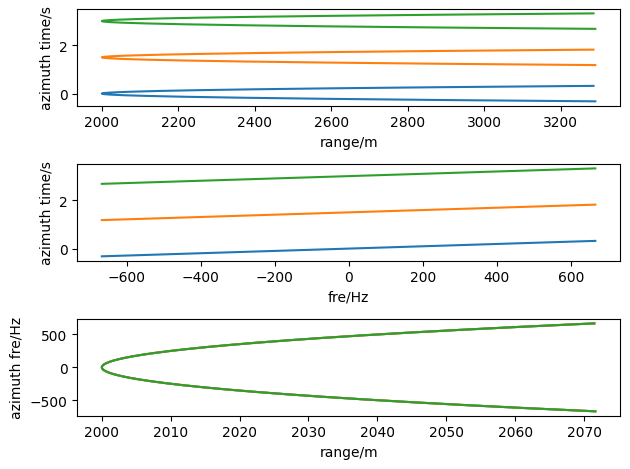

In [83]:
delta_eta = 1.5
plt.figure()
plt.subplot(3,1,1)
plt.plot(R_1,eta_1)
plt.plot(R_1,eta_1 + delta_eta)
plt.plot(R_1,eta_1 + 2*delta_eta)
plt.xlabel('range/m')
plt.ylabel('azimuth time/s')

plt.subplot(3,1,2)
plt.plot(f_eta1,eta_1)
plt.plot(f_eta1,eta_1 + delta_eta)
plt.plot(f_eta1,eta_1 + 2*delta_eta)
plt.xlabel('fre/Hz')
plt.ylabel('azimuth time/s')

plt.subplot(3,1,3)
plt.plot(Rf_1,f_eta1)
plt.plot(Rf_1,f_eta1)
plt.plot(Rf_1,f_eta1)
plt.xlabel('range/m')
plt.ylabel('azimuth fre/Hz')
plt.tight_layout()

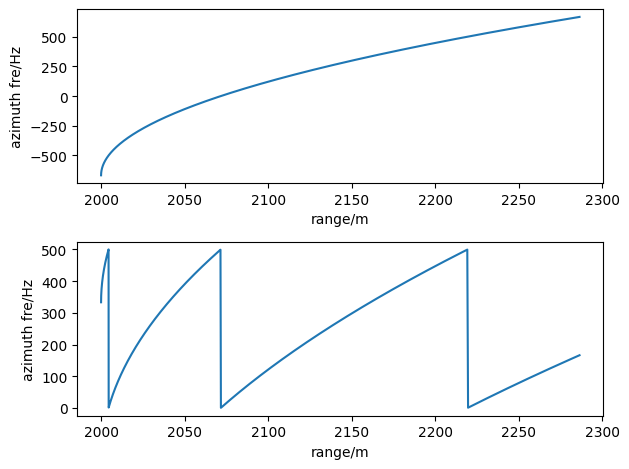

In [89]:

f_eta = np.linspace(-f_dop/2,f_dop/2-f_dop/2048,N)
Rf = R_0[:,0]  + Lambda**2*R_0[:,0]/(8*V_r**2)*(f_eta+f_dop/2)**2
plt.figure()
plt.subplot(2,1,1)
plt.plot(Rf,f_eta)
plt.xlabel('range/m')
plt.ylabel('azimuth fre/Hz')

plt.subplot(2,1,2)

PRF = 250
f_eta_ol = np.mod(f_eta,2*PRF)
# f_eta_ol[(f_eta1)>PRF] =2*PRF - f_eta_ol[(f_eta1)>PRF]
plt.plot(Rf,f_eta_ol)
plt.xlabel('range/m')
plt.ylabel('azimuth fre/Hz')
plt.tight_layout()